In [1]:
!unzip -o store-sales-time-series-forecasting.zip


Archive:  store-sales-time-series-forecasting.zip
  inflating: holidays_events.csv     
  inflating: oil.csv                 
  inflating: sample_submission.csv   
  inflating: stores.csv              
  inflating: test.csv                
  inflating: train.csv               
  inflating: transactions.csv        


In [2]:
import pandas as pd

df = pd.read_csv("train.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [3]:
daily_data = df.groupby('date').agg({
    'sales': 'sum',
    'onpromotion': 'sum'
}).reset_index()

daily_data.head()


,date,sales,onpromotion
0,2013-01-01,2511.618999,0
1,2013-01-02,496092.417944,0
2,2013-01-03,361461.231124,0
3,2013-01-04,354459.677093,0
4,2013-01-05,477350.121229,0


In [5]:
daily_data['date_ordinal'] = daily_data['date'].map(pd.Timestamp.toordinal)


In [6]:
X = daily_data[['date_ordinal', 'onpromotion']]
y = daily_data['sales']


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test)


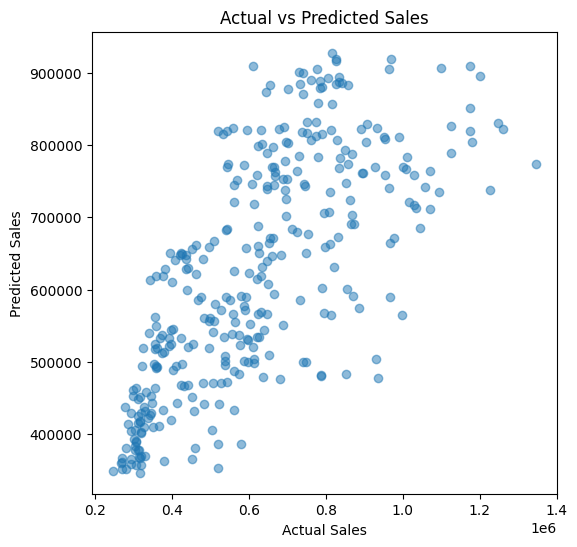

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


Linear Regression Model Summary

In this task, I built a linear regression model to predict sales based on time and promotional activity.
The date was converted into numerical format, and promotion data was used as an additional feature.
The model was trained on historical sales data and tested on unseen data.
The comparison between actual and predicted sales shows that the model captures the overall sales trend.
